In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import altair as alt

In [8]:
df = pd.read_csv('/mnt/hgfs/VMs_Shared/datasets/filtered/df_Final_filtered.csv')

In [9]:
df.head()

,datetime,compound,tweets_count,tweets_neg,tweets_pos,tweets_neu,neg_avg,pos_avg,links_count,bots_count,open,high,low,close,btc_volume,curr_volume
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,522951.00
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.30,219605.16
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,386739.15
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.20,408360.03
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,637045.88


In [91]:
df_slice = df.iloc[:5000]
df_slice = df_slice.dropna(axis=0)

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

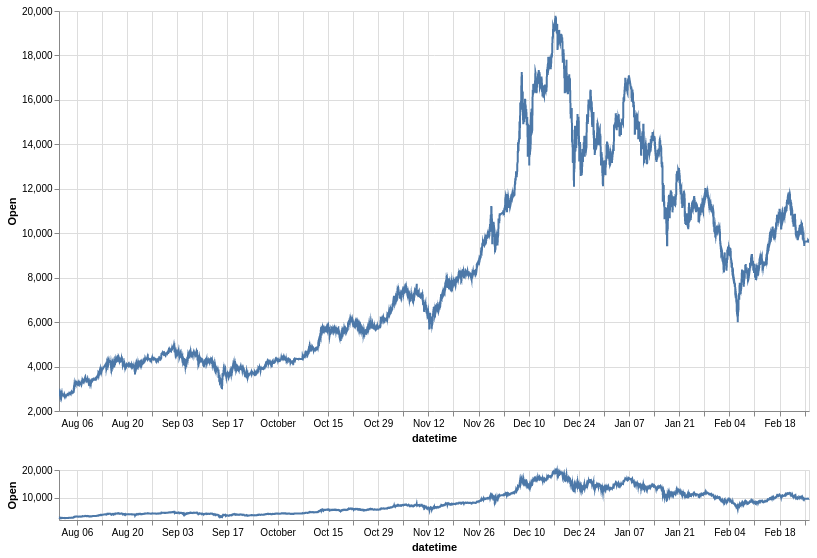

In [132]:
chart_min = min(df_slice['open']) * 0.9
chart_max = max(df_slice['open'])


selector = alt.selection(type='interval', encodings=['x'])

base = alt.Chart(df_slice).mark_line() \
        .encode(y=alt.Y('open', scale=alt.Scale(domain=(chart_min, chart_max)), title='Open')) \
        .properties(width=750)
    
main = base.properties(height=400).encode(alt.X('datetime:T', scale=alt.Scale(domain=selector)))

bottom = base.properties(height=50).encode(alt.X('datetime:T')).add_selection(selector)

main & bottom